In [26]:
# import scikit learn databases
from sklearn import datasets
import requests
import os
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt
import matplotlib as pyplot
%matplotlib inline
# import california housing data from sklearn and store data into a variable
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [4]:
# import pandas and numpy
import pandas as pd
import numpy as np
# define the columns names of the data then convert to dataframe
print(calihouses.feature_names)
headers = calihouses.feature_names
df = pd.DataFrame(calidata, columns=headers)
# print the df and shape to get a better understanding of the data
print(df.shape)
print(df)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5      4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6      3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7      3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9      3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10     3.2

In [5]:
y=calihouses.target
# create testing and training sets for hold-out verification using scikit learn method
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=.25)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(15480, 8) (15480,)
(5160, 8) (5160,)


In [6]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
dtypes: float64(8)
memory usage: 1.3 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
from timeit import default_timer as timer
start_ho = timer()

In [6]:
# fit a model using linear model method from sklearn
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [7]:
# generate predictions
predictions = lm.predict(X_test)
end_ho = timer()
# calcualte function runtime
time_ho = (end_ho - start_ho)
# show predictions
print(predictions)


[0.56632001 1.04086175 1.92180833 ... 2.32064991 0.81266839 1.61280888]


In [8]:
#import seaborn and plotly
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#set viz style
sns.set_style('dark')
#plot the model
plot=sns.scatterplot(y_test,predictions)
plot.set(xlabel='Given',ylabel='Predictions')
#generate and graph y=x line
x_plot=np.linspace(0,5,100)
y_plot=x_plot
plt.plot(x_plot,y_plot,color='g')

In [ ]:
start_ho_score = timer()
# model score (neg_mean_squared_error)
from sklearn import metrics
ho_score = -1*metrics.mean_squared_error(y_test, predictions)
print(ho_score)
end_ho_score = timer()
ho_score_time = (end_ho_score - start_ho_score)

-0.520034048249145


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#k fold prediction
X=np.array(df)
#again,timing the function for comparision
start_kfold =timer()
#usecross_val_predict
lm_k =linear_model.LinearRegression()
k_predictions=cross_val_predict(lm_k,X,y,cv=10)
print(k_predictions)
end_kfold =timer()
kfold_time =(end_kfold-start_kfold)

[4.22358985 4.04800271 3.75534521 ... 0.14474758 0.29600522 0.49525933]


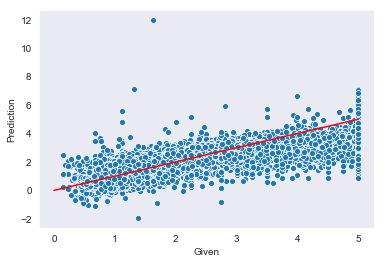

In [ ]:
# plot k-fold predictions against actual
plot_k =sns.scatterplot(y,k_predictions)
plot_k.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [ ]:
kfold_score_start = timer()
# find the mean score from the k-fold models usinf cross_val_score
kfold_scores = cross_val_score(lm_k, X, y, cv=10, scoring='neg_mean_squared_error')
print(kfold_scores)
print(kfold_scores.mean())
kfold_score_end = timer()
kfold_score_time = (kfold_score_end - kfold_score_start)

[-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]
-0.5509524296956663


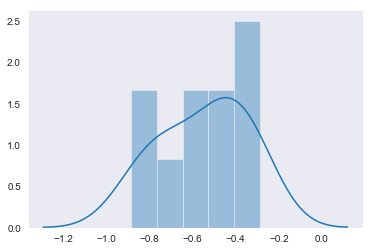

In [ ]:
# plot scores
sns.distplot(kfold_scores, bins=5)

In [ ]:
#You will notice, however, that running the following code will take much longer than previous methods. We’ll dig into that later.
start_LOO = timer()
# generate LOO predictions
LOO_predictions = cross_val_predict(lm_k, X, y, cv=(len(X)))
end_LOO = timer()
LOO_time = (end_LOO - start_LOO)

In [ ]:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y, LOO_predictions)
plot_LOO.set(xlabel='Given', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='y')

In [ ]:
LOO_score_start = timer()
# find the mean score from the LOO models using cross_val_score 
LOO_score = cross_val_score(lm_k, X, y, cv=(len(X)), scoring='neg_mean_squared_error').mean()
print(LOO_score)
LOO_score_end = timer()
LOO_score_time = (LOO_score_end - LOO_score_start)

In [ ]:
print("Hold out method took", time_ho, "seconds to generate a model and", ho_score_time ,"seconds to generate a MSE of", ho_score)
print("K-Fold method took", kfold_time, 'seconds to generate a model and', kfold_score_time, 'seconds to generate a MSE of', kfold_scores.mean())
print("Leave One Out Cross Validation method took", LOO_time, 'seconds to generate a model and', LOO_score_time, 'seconds to generate a MSE of', LOO_score)

In [9]:
len(df)-df.count()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [22]:
corr_matrix=df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [24]:
corr_matrix["MedInc"].sort_values(ascending=False)

MedInc        1.000000
AveRooms      0.326895
AveOccup      0.018766
Population    0.004834
Longitude    -0.015176
AveBedrms    -0.062040
Latitude     -0.079809
HouseAge     -0.119034
Name: MedInc, dtype: float64

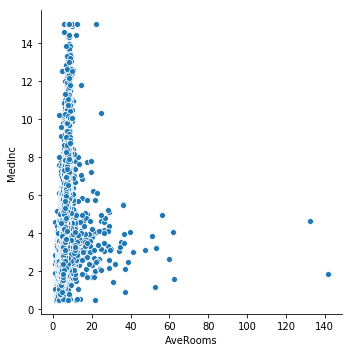

In [27]:
ax = sns.relplot(x="AveRooms", y="MedInc", data=df)

C:\Users\GT\Anaconda3\lib\site-packages\matplotlib\text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


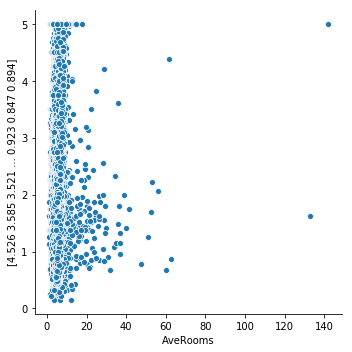

In [34]:
ax = sns.relplot(x="AveRooms", y=y, data=df)

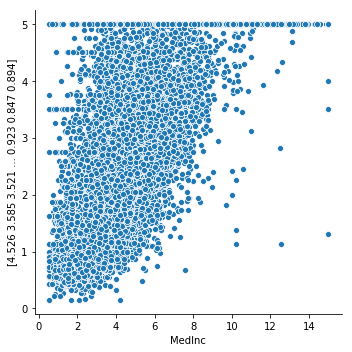

In [35]:
ax = sns.relplot(x="MedInc", y=y, data=df)

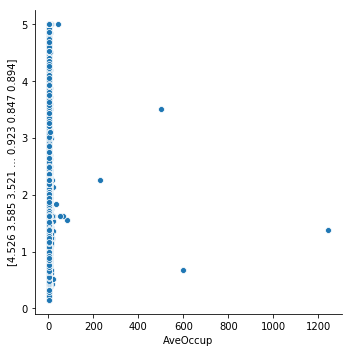

In [36]:
ax = sns.relplot(x="AveOccup", y=y, data=df)

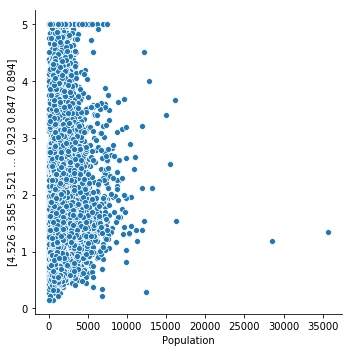

In [37]:
ax = sns.relplot(x="Population", y=y, data=df)

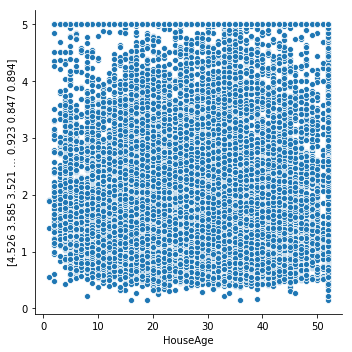

In [38]:
ax = sns.relplot(x="HouseAge", y=y, data=df)

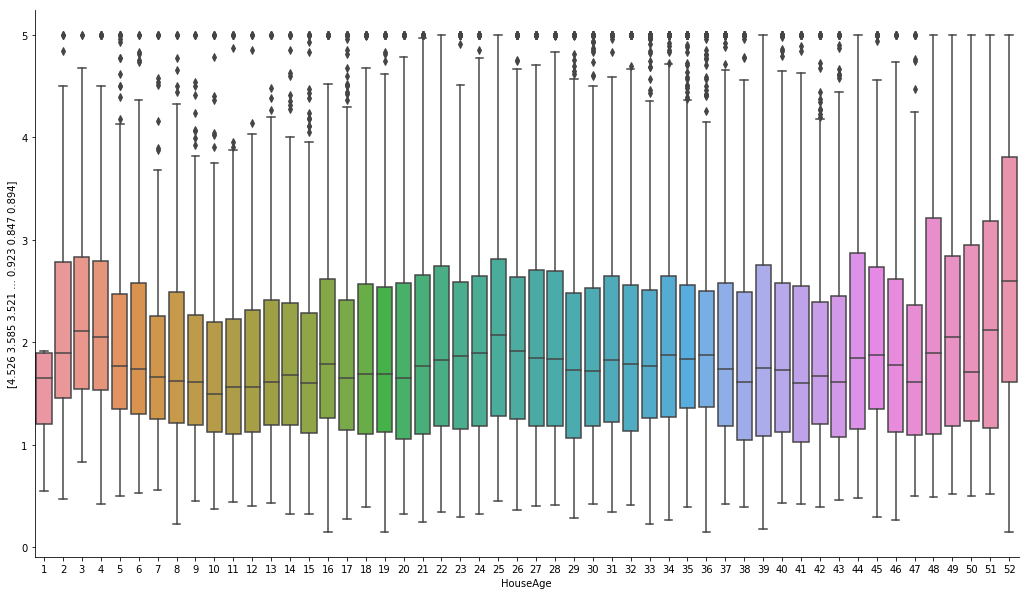

In [44]:
df['HouseAge'] = df['HouseAge'].astype('uint8')
g = sns.catplot(x="HouseAge",
                y=y, 
                data=df, 
                kind="box")
g.fig.set_figwidth(16)
g.fig.set_figheight(9)
#'housing median age ' does not seem an interesting predictive feature

#However it seems like the the most old houses can be quite expensive comparing to less old other houses

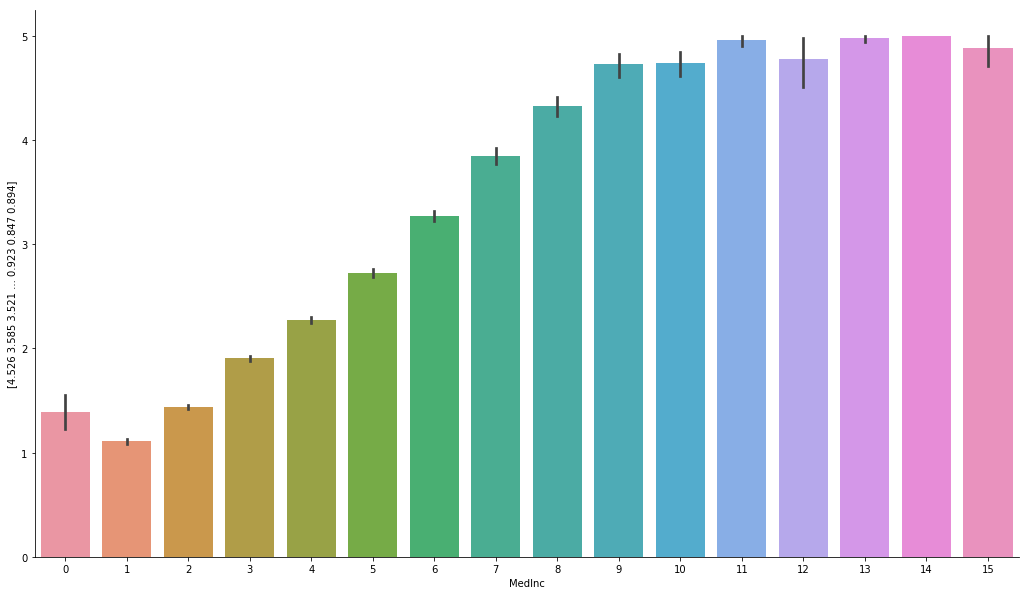

In [48]:
df['MedInc'] = df['MedInc'].astype('uint8')
g = sns.catplot(x="MedInc",
                y=y, 
                data=df, 
                kind="bar")
g.fig.set_figwidth(16)
g.fig.set_figheight(9)

In [2]:
import plotly.express as px

fig = px.scatter(df, x="Longitude", y="Latitude",color="MedInc")
fig.show()

NameError: name 'df' is not defined

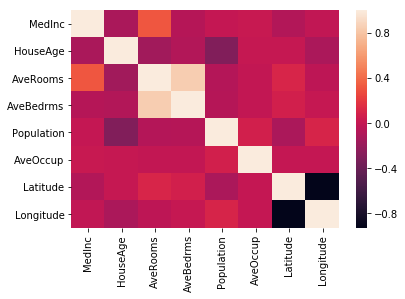

In [57]:
corr_matrix = df.corr()
#corr_matrix["median_house_value"].sort_values(ascending=False)
sns.heatmap(corr_matrix)

In [ ]:
fig = px.scatter_matrix(df)